Im Rahmen des Moduls "Maschinelles Lernen" wurde dieses Juypter Notebook von Lisa Tawackoli und Ruslan Adilgereev entwickelt. Der Programmentwurf nutzt den Datensatz "wbdc_5.csv", welcher Daten aus der Bildanalyse aus Feinnadelbiopsien bei Brusttumoren enthält. Ziel ist es, präzise Modelle zur Klassifizierung von Brusttumoren in die Kategorien gutartig (benigne) und bösartig (maligne) zu entwickeln.

Um dieses Ziel zu erreichen, werden verschiedene Machine-Learning Algorithmen eingesetzt, und in Bezug auf ihre Effektivität verglichen. Zu diesen Algorithmen gehören das Multilayer Perceptron (MLP), der Entscheidungsbaum (Decisiontree) und die Support Vector Machine (SVM). Es gilt zudem, die Lernergebnisse bezüglich der diskutierten Qualitätskriterien zu bewerten und die Modelle, sowie verschiedene Konfigurationen dieser, zur Optimierung des Ergebnisses vorzunehmen.

**1. Datenerfassung**

In [2]:
#Importieren der notwendigen Bibliotheken
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import name

Für die Verwendung der Algorithmen müssen die Daten in einem ersten Schritt entsprechend vorbereitet werden. Um zu wissen, welche Anpassungen in diesem Kontext vorgenommen werden müssen, wird der Datensatz eingelesen und sich zunächst ein Überblick über dessen Struktur verschafft.

In [3]:
#Laden des Datensatzes und die Ausgabe der ersten fünf Zeilen (Kopf) dessen
data = pd.read_csv('wbdc_5.csv')  
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,...,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,897374,B,12.30,19.02,77.88,464.4,0.04202,0.007756,0.008535,0.1539,...,0.002222,13.35,28.46,84.53,544.3,0.09052,0.03619,0.03983,0.2554,0.07207
1,8910251,B,10.60,18.95,69.28,346.4,0.11470,0.063870,0.026420,0.1922,...,0.003318,11.88,22.94,78.28,424.8,0.25150,0.19160,0.07926,0.2940,0.07587
2,854941,B,13.03,18.42,82.61,523.8,0.03766,0.025620,0.029230,0.1467,...,0.001777,13.30,22.81,84.46,545.9,0.04619,0.04833,0.05013,0.1987,0.06169
3,89869,B,14.76,14.74,94.87,668.7,0.07780,0.046080,0.035280,0.1521,...,0.002783,17.27,17.93,114.20,880.8,0.20090,0.21510,0.12510,0.3109,0.08187
4,9113538,M,17.60,23.33,119.00,980.5,0.20040,0.213600,0.100200,0.1696,...,0.011300,21.57,28.87,143.60,1437.0,0.47850,0.51650,0.19960,0.2301,0.12240


Der Einblick in die ersten fünf Zeilen des Datensatzes verrät, dass er sich aus 29 Spalten zusammensetzt. Diese bestehen auf den ersten Blick, mit Ausnahme der ersten beiden Spalten "ID" und "Diagnosis", aus numerischen Daten. Da die Algorithmen numerische Daten benötigen, müssen kategorische Daten entsprechend umgewandelt werden. Um uns darüber zu vergewissern, dass diese beiden Spalten die einzigen kategorischen darstellen, lassen wir uns die benötigten Informationen ausgeben.

In [4]:
#Zusammenfassende Information über das DataFrame
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  501 non-null    int64  
 1   Diagnosis           501 non-null    object 
 2   radius1             501 non-null    float64
 3   texture1            501 non-null    float64
 4   perimeter1          501 non-null    float64
 5   area1               501 non-null    float64
 6   compactness1        501 non-null    float64
 7   concavity1          501 non-null    float64
 8   concave_points1     501 non-null    float64
 9   symmetry1           501 non-null    float64
 10  fractal_dimension1  501 non-null    float64
 11  radius2             501 non-null    float64
 12  texture2            501 non-null    float64
 13  perimeter2          501 non-null    float64
 14  area2               501 non-null    float64
 15  compactness2        501 non-null    float64
 16  concavit

Diese Auskunft über den Datensatz vergewissert uns, dass er ausschließlich die zwei bereits genannten Spalten mit Daten kategorischer Art enthält. Der Count gibt uns außerdem Auskunft darüber, dass alle Felder des Datensatzes besetzt sind. Darauf basierend besteht die Annahme, dass es keine fehlenden Werte im Datensatz gibt. 

**2. Datenexploration und -vorverarbeitung**

**2.1 Explorative Datenanalyse**

In [5]:
#Ausgeben einer deskriptiven Statistik zum Datensatz, um ein Gefühl für Tendenzen und Streuungen zu bekommen
pd.set_option('display.max_columns', None)
data.describe()

,ID,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.054487e+07,14.209036,19.198802,92.478323,661.344311,0.103989,0.088399,0.049339,0.181232,0.062651,0.403946,1.217593,2.858572,40.160397,0.024842,0.031528,0.011855,0.020434,0.003703,16.353329,25.561178,107.724671,887.457285,0.250233,0.268624,0.115245,0.289081,0.083408
std,1.266249e+08,3.510540,4.301340,24.154774,349.835088,0.051752,0.078738,0.038679,0.027541,0.007043,0.268925,0.567992,1.970236,41.803163,0.016850,0.030857,0.006252,0.008390,0.002466,4.789774,6.138863,33.187148,560.583121,0.148550,0.200673,0.065013,0.060569,0.017668
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.694760e+05,11.760000,16.150000,76.090000,427.300000,0.066300,0.029660,0.020540,0.162100,0.057680,0.233500,0.828200,1.602000,17.850000,0.013080,0.014820,0.007620,0.014880,0.002234,13.110000,20.980000,84.530000,523.400000,0.148200,0.114500,0.065280,0.248800,0.071470
50%,9.062900e+05,13.400000,18.800000,86.600000,553.500000,0.093620,0.061550,0.034000,0.178800,0.061400,0.324200,1.083000,2.281000,24.530000,0.020160,0.025440,0.011030,0.018570,0.003100,14.980000,25.230000,97.820000,688.600000,0.215600,0.228200,0.101200,0.281200,0.079870
75%,8.860702e+06,16.030000,21.680000,105.100000,797.800000,0.129900,0.127200,0.073640,0.195700,0.066000,0.476800,1.480000,3.384000,45.420000,0.031790,0.040170,0.014660,0.023080,0.004452,18.980000,29.430000,126.300000,1095.000000,0.337100,0.382900,0.160700,0.317900,0.091360
max,9.113205e+08,28.110000,39.280000,188.500000,2499.000000,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,525.600000,0.100600,0.396000,0.052790,0.078950,0.029840,33.130000,49.540000,229.300000,3432.000000,1.058000,1.252000,0.291000,0.663800,0.207500


Die deskriptive Statistik lässt vermuten, dass die Werte unterschiedlich skaliert sind. Während beispielsweise die Werte von "area1" im Bereich von Tausenden liegen, weisen "concavity1" oder "fractal dimension" Werte nahe Null auf. Eine Skalierung der Daten wäre daher im weiteren Vorgehen sinnvoll. 

Was bei näherer Betrachtung ebenfalls auffällt ist, dass ein Datensatz, der in der Variable "concavity1" den Wert 0 hat, ebenfalls einen Wert von 0 für die Variable "concave_points_1" hat. Da die beiden Variablen auch einen ähnlichen Namen habe besteht die Vermutung, dass diese Variablen möglicherweise dieselben Merkmale repräsentieren. Auch auffällig ist, dass die Variablen, die die "Concavity" repäsentieren auf den ersten Blick die einzigen, die teilweise 0 zum Wert haben. 

Dass ein Großteil der Variablen einen großen Sprung zwischen den Werten im 75%-Quartil und dem Maximalwert aufweist, deutet außerdem auf Ausreißer hin.


Da die Zielvariable in unserem Fall kategorisch ist (bösartig bzw. gutartig), bietet sich das Barplot (Balkendiagramm) an, die Verteilung zu visualisieren.

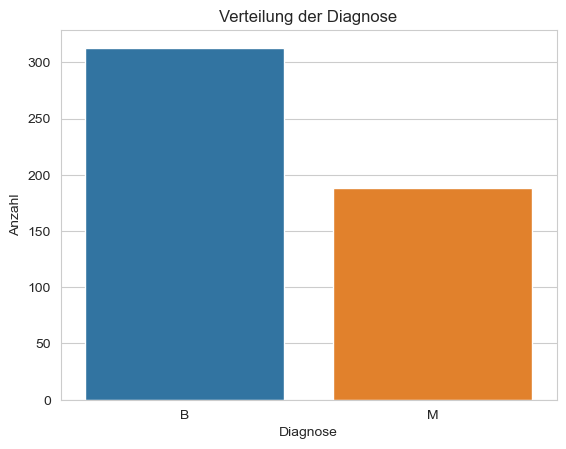

In [6]:
# Erstellen eines Barplots für die Zielvariabe (Diagnose)
sns.set_style("whitegrid")
sns.countplot(x='Diagnosis', data=data)
plt.title('Verteilung der Diagnose')
plt.xlabel('Diagnose')
plt.ylabel('Anzahl')
plt.show()

In [7]:
data.where(data["Diagnosis"]=="B")["Diagnosis"].count()

313

Das Balkendiagramm zeigt, dass es eine ungleiche Verteilung der Klassen "bösartig" und "gutartig" gibt. Genauer gibt es von den 501 Diagnosen 313, bei denen ein gutartiger Tumor diagnostiziert wurde und somit 188 Diagnosen von bösartigen Tumoren. Basierend auf diesem Ungleichgewicht könnten einige Modelle dazu neigen, die dominante Klasse besser zu klassifizieren. Es ist daher besonders wichtig, für die Bewertung Leistungsmetriken zu wählen, die das Ungleichgewicht berücksichtigen. Dazu gehören die Precision, der Recall oder der F1-Score. 

**2.2 Datenbereinigung**

Der Gesamtüberblick vergewisserte uns in der Annahme, dass neben den Spalten "ID" und "Diagnosis" keine weiteren kategorischen Daten enthalten sind. Da die Spalte "ID" keine prädikative Information enthält, kann diese aus dem Datensatz entfernt werden.

In [8]:
#Entfernen der ID Spalte, da keine prädikative Information
data.drop('ID', axis=1, inplace=True) 

Nach dem Entfernen der Spalte "ID" bleibt als Spalte kategorischer Art die "Diagnose" übrig. Sie stellt die vorherzusagende Information dar. 

Da fehlende Daten im Datensatz die Modellgenauigkeit reduzieren, zu Verzerrungen führen und die Komplexität der Datenverarbeitung erhöhen können, müssen diese im nächsten Schritt identifiziert und anschließend mithilfe geeigneter Methoden wie Imputation angepasst oder aus dem Datensatz entfernt werden (sofern der Anteil nicht zu groß ist). 

In [9]:
#Ausgabe der Anzahl von Duplikaten und NaN Werten
duplicate_count = data.duplicated().sum()
print("Nas:", data.isna().sum().sum())
print("Duplikate:", duplicate_count)

Nas: 0
Duplikate: 0



In unserem Datensatz haben wir festgestellt, dass Werte von 0 in den Spalten wie concavity nicht fehlerhaft sind, sondern tatsächlich valide Nullwerte repräsentieren, die auf das Fehlen von konkaven Einschnitten im Tumorgewebe hinweisen. Eine Imputation dieser Nullwerte oder deren Löschung würde zu einer Verzerrung der Ergebnisse führen, da solche Eingriffe fälschlicherweise die Charakteristika bösartiger Tumore einbringen könnten. Beispielsweise könnten imputierte Werte über 0 oder eine veränderte Verteilung durch Löschung der Nullwerte die Analyse beeinflussen. Eine Überprüfung dieser Annahme durch das Löschen von Zeilen mit einem concavity-Wert von 0 und anschließende Betrachtung der Datenverteilung ergab, dass Tumore mit concavity 0 durchweg gutartig waren. Daher haben wir beschlossen, keine Imputation oder Löschung dieser Nullwerte vorzunehmen, um die Integrität und Genauigkeit unserer Datenanalyse zu wahren.

**2.3 Feature Engineering**

Um kategorische Daten zu numerischen Daten umzuwandeln, wird das Label-Encoding angewandt. Diese Methode bietet sich insbesondere dadurch an, dass es nur zwei zu codierende Kategorien gibt ("B" und "M"), welche sich über 0 und 1 numerisch intuitiv darstellen lassen. Gegen die Alternative, das One-Hot Encoding, spricht, dass zwei separate Spalten und damit Redundanz erzeugt würden.

In [10]:
#Codieren der Diagnose mittels Label Encoding
data["Diagnosis"] = data["Diagnosis"].map({"B": 0, "M":1})

**2.4 Korrelationsmatrix**

Eine Korrelationsmatrix zeigt, wie stark jedes Paar von Features miteinander in Beziehung steht. Eine hohe Korrelation (>0.7) zwischen zwei Features kann darauf hindeuten, dass sie redundante Informationen tragen, was **Multikollinearität** genannt wird und vermieden werden sollte.

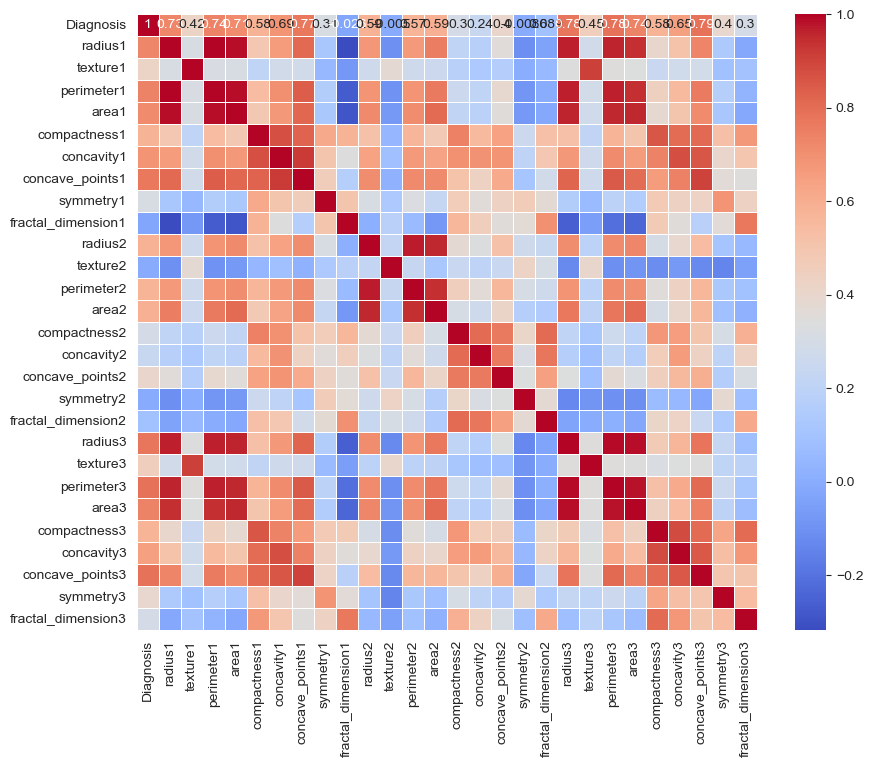

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

**Ergänzen oder Anpassen? Sagt meiner Meinung nach noch nichts aus. Mehr darauf eingehen**

**2.5 Train-/ Test-Split**

Das Aufteilen der Daten in Trainings- und Testsets dient dazu, das  Modell mit einem Datensatz zu trainieren und die Leistung unabhängig mit einem anderen Datensatz zu bewerten. So kann das Modell auf Overfitting getestet werden und die Übertragbarkeit auf neue Daten sichergestellt werden. Da es sich bei der Diagnose um die zu vorhersagende Kennzahl handelt, wird diese als Zielvariable (y) gespeichert und aus den Features (X) entfernt.

In [12]:
from sklearn.model_selection import train_test_split 

#Aufteilen der Daten in Features(X) und die zu vorhersagende Zielvariable(y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Aufteilen der Daten in Trainings- und Testdaten (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2.6 Skalierung der Daten**

Die meisten Machine-Learning-Algorithmen reagieren empfindlich auf die Skalierung der Eingabedaten. Der Grund hierfür ist, dass sie Distanzmetriken nutzen, um die Ähnlichkeit zwischen Datenpunkten zu berechnen. Wenn Merkmale also in unterschiedlichen Maßstäben vorliegen, beeinträchtigt das möglicherweise die Modellleistung, und Merkmale mit größeren Wertebereichen werden stärker gewichtet. Da im Rahmen der explorativen Datenanalyse auffiel, dass unsere Features in unterschiedlichen Wertebereichen liegen, muss hier entsprechend gehandelt werden. Hierfür wird ein sogenanntes Feature-Scaling in Form einer Standardisierung vorgenommen. Diese bietet sich insbesondere dann an, wenn Daten unterschiedliche Einheiten haben, oder die Algorithmen, wie in unserem Fall SVM und neuronale Netze, emfpindlich gegenüber der Varianz in den Daten reagieren. 

In [13]:
# Standardisierung des Datensatzes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVMs und neuronale Netz profitieren von einer Standardisierung mittels des StandardScalers. Dieser führt eine Z-Score-Normalisierung durch, welche die Daten so anpasst, dass die Standardabweichung jeder Feature-Spalte 1 und der Mittelwert 0 beträgt. 

In [14]:
# Normalisierung der Daten
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

Eine weitere Möglichkeit, die Daten zu skalieren, besteht in der Min-Max-Skalierung. Während die Standardisierung den Mittelwert entfernt und die Daten auf Einheitsvarianz skaliert, skaliert die Min-Max-Skalierung die Daten auf einen festgelegten Bereich von üblicherweise 0 bis 1. 

**3. Modellierung der Baseline Modelle**

Im ersten Schritt sollen sogenannte Baseline-Modelle trainiert und deren Ergebnisse evaluiert werden. Im anschließenden Abschnitt sollen die Modelle, je nach Ergebnis, entsprechend optimiert und die Maßnahmen diskutiert werden.

***2.1 Support Vector Machine***

In [15]:
# Da für binäre Klassifikation ein linearer Kernel oft gut funktioniert, wird dieser verwendet
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
predictions = svm_model.predict(X_test_scaled)

In [16]:
# Auswertung des Modells
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9900990099009901
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        39

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Die Accuracy misst den Anteil der insgesamt korrekt klassifizierten Fälle und ist mit einem Score von 0.99009(...) und sehr hoch. Das SVM Modell hat 99% der Fälle korrekt vorhergesagt. Die Precision  für die Klassifikation der gutartigen Tumore liegt bei 1,00, was bedeutet, dass alle vom Modell als gutartig klassifizierte Tumore tatsächlich gutartig sind. Für die Vorhersage der bösartigen Tumore liegt die Präzision bei 0.97, was bedeutet, dass 97% der Vorhersagen hier korrekt getroffen wurden. 

Der F1-Score ist eine verbreitete Bewertungsmetrik für binäre Klassifizierungsmodelle, die das eine den Recall und die Precision kombiniert. Der Wert kann zwischen 0 und 1 liegen, wobei ein Wert von 1 für eine perfekte Genauigkeit und Sensitivität steht,  und 0 für eine schlechte Performance in der Klassifikation. Der Wert von 0,99 weist somit auf eine sehr ausgewogene Klassifikationsleistung für gutartige Tumore hin.

Der Recall, die Sensitivität, ist insbesondere in der medizinischen Diagnostik eine relevante Kennzahl zur Bewertung unseres Modells. Er misst die Rate, der korrekt identifizierten positiven Fälle (in diesem Fall bösartige Tumore). Es wird ein hoher Recall angestrebt, um die Anzahl, falsch negativer Ergebnisse zu minimieren, durch die ein tatsächlich bösartiger Tumor übersehen werden könnte. Der Wert liegt im Falls unserer SVM für die Klassifizierung der gutartigen Tumore bei 0.98. Das bedeutet, dass 98% der tatsächlich gutartigen Fälle korrekt erkannt wurden. Für die Zuordnung der bösartigen Tumore liegt der Recall bei einem Wert von 1.00, was bedeutet, dass tatsächlich alle bösartigen Fälle korrekt erkannt wurden. 

Der Support zeigt die Anzahl der tatsächlichen Vorkommen in jeder Klasse im Testdatensatz, nämlich 62 gutartige und 39 bösartige Tumore. Der Macro-Avg gibt die durchschnittlichen, ungewichteten Werte für Präzision, Recall und F1-Score. Der Wert liegt bei 0.99, was bedeutet, dass das Modell im Durchschnitt über beide Klassen hinweg eine ausgezeichnete Leistung erbringt. Wenn die unterschiedlichen Größen der Klassen (Support) berücksichtigt werden (Weighted avg), liegt der Wert weiterhin bei 0.99 und weist somit eine ausgezeichnete Leistung auf.

Angesichts der Ungleichheit in der Verteilung der Diagnosen in unserem Datensatz, besteht ein Problem im Einsatz des F1-Scores als Bewertungsmetrik. Dieser neigt dazu, die Leistung des Modells in Bezug auf die überrepräsentierte Klasse, die der benignen Tumore, zu bevorzugen. Somit ergibt sich potenziell eine überoptimistische Sicht der tatsächlichen Modelleistung, wenn es darum geht die bösartigen Tumore zu identifizieren. Der Matthews-Korrelationskoeffizient (MCC) bietet eine geeignete Alternative, die ein umfassenderes Bild über die Modelleistung bietet, indem er alle Elemente der Konfusionsmatrix mit einbezieht. Ein hoher MCC in einem ungleichen Datensatz ist ein Indikator dafür, dass das Modell nicht nur die häufigere Klasse gut erkennt, sondern auch die weniger häufige.

In [17]:
from sklearn.metrics import matthews_corrcoef, roc_auc_score
mcc = matthews_corrcoef(y_test, predictions)
print("Matthews-Korrelationskoeffizient:", mcc)

Matthews-Korrelationskoeffizient: 0.9794254405254067


Da der MCC Werte zwischen -1 und +1 annehmen kann, wobei eine -1 eine totale Diskrepanz zwischen Vorhersage tatsächlichen bedeutet und +1 eine perfekte Vorhersage darstellt, weist das Ergebnis mit einem Wert von 0.979 auf eine hervorragende Vorhersageleistung des Modells hin. Im Kontext des unausgewogenen Datensatzes ist der hohe MCC besonders bedeutsam, da er im Gegensatz zu anderen Metriken nicht durch die Klassenverteilung verzerrt wird.Die Ergebnisse suggerieren insgesamt, dass das SVM Modell bei der Klassifizierung außergewöhnlich gut abschneidet. Insbesondere bei einer so hohen Leistung ist es wichtig zu berücksichtigen, dass dies auch auf Overfitting zurückzuführen sein kann. Um das zu überprüfen, sollte das Ergebnis zusätzlich durch Kreuzvalidierung geprüft werden.

Bei der Kreuzvalidierung wird der Datensatz in mehrere Teile aufgeteilt, wobei abwechselnd ein Teil zum Testen und die übrigen Teile zum Trainieren des Modells verwendet werden. Dies ermöglicht eine umfassendere Bewertung der Leistung der Modelle über verschiedene Datenpartitionen hinweg und hilft,  Overfitting zu erkennen. 

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#Erstellen des StratifiedKFold-Cross-Validators
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definieren der Scoring-Metriken
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Präzision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
}

# Durchführung der Kreuzvalidierung und Speichern der Ergebnisse
cross_val_results = {}
for metric_name, metric in scoring_metrics.items():
    cross_val_results[metric_name] = cross_val_score(svm_model, X_train_scaled, y_train, cv=stratified_kfold, scoring=metric)
    
# Anzeigen der durchschnittlichen Scores für jede Metrik
for metric_name, score_array in cross_val_results.items():
    print(f'{metric_name.capitalize()} average score: {score_array.mean()}')

Accuracy average score: 0.975
Präzision average score: 0.9859605911330049
Recall average score: 0.945977011494253
F1 average score: 0.9651283141172096


Die Ergebnisse der Kreuzvalidierung stützen die Performance des Modells, das im Durchschnitt eine Accuracy von 97,5% erreicht, was eine hohe Zuverlässigkeit und Generalisierbarkeit widerspiegelt. Die Präzision von 98,6% signalisiert eine niedrige Rate von False Positives, während der Recall mit einem Wert von durchschnittlich 94,6% auf eine effektive Erkennung bösartiger Tumore hinweist. Die Ergebnisse belegen die Verlässlichkeit und Stabilität des Modells. Da die Metriken nach Kreuzvalidierung immernoch ähnlich hohe Werte aufweisen, kann ist ein Overfitting des Modells trotz der hervorragenden Ergebnisse mit hoher Wahrscheinlichkeit auszuschließen.

**2.2 Multilayer Perceptron**

Da das Multilayer Perceptron ebenfalls emfpindlich auf Feature-Skalierungen reagieren, werden dieselbe Datenaufteilung und -skalierung wie für die Support Vector Machine verwendet. Um im ersten Schritt die Architektur des Multilayer Perceptrons zu definieren, wurde zunächst eine Konfiguration mit zwei versteckten Schichten festgelegt, wobei die erste Schicht 100 Neuronen und die zweite Schicht 50 Neuronen umfasst. Diese Anordnung ermöglicht die Modellierung komplexer Zusammenhänge, ohne direkt das Risiko des Overfittings zu erhöhen. 

Als Aktivierungsfunktion wurde ReLU gewählt, da sie sich in der Praxis bewährt hat und häufig dazu beiträgt, das Problem des verschwindenden Gradienten zu vermeiden. Der Optimierer 'adam' wurde aufgrund seiner Effizienz und der Fähigkeit, adaptive Lernraten zu nutzen, ausgewählt. Der Regularisierungsparameter alpha wurde auf einen Wert von 0.0001 gesetzt, um einem Overfitting entgegenzuwirken, indem ein sanfter Druck auf kleinere Gewichtswerte ausgeübt wird. 

Die Anzahl der Iterationen wurde auf 200 festgesetzt, um dem Modell genügend Raum für die Konvergenz zu geben, ohne hohe Rechenzeiten in Kauf nehmen zu müssen. Die initiale Lernrate wurde auf einen Wert von 0.001 eingestellt, um ein ausgewogenes Verhältnis zwischen Fortschritt und Stabilität während des Trainingsprozesses zu erreichen. Diese Einstellungen dienen als Ausgangspunkt für die Entwicklung des Modells, wobei eine iterative Feinabstimmung vorgesehen ist, um die Architektur an die spezifischen Anforderungen der Daten anzupassen.

In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                    solver='adam', alpha=0.0001, 
                    batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, max_iter=200, 
                    shuffle=True, random_state=42, tol=0.0001, 
                    verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=10)

In [28]:
mlp.fit(X_train_scaled, y_train)
mlp_predictions = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, mlp_predictions))
print(classification_report(y_test, mlp.predict(X_test_scaled)))

Accuracy: 0.9900990099009901
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        39

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [24]:
mcc = matthews_corrcoef(y_test, mlp_predictions)
print("Matthews-Korrelationskoeffizient:", mcc)

Matthews-Korrelationskoeffizient: 0.9794254405254067


Bei näherer Betrachtung der Ergebnisse der beiden bisher angewandten Modelle, fällt auf, dass beide Modelle eine identische Accuracy von rund 99% erreichen. Allerdings weisen die präziseren Metriken der Klassifikationsleistung aufschlussreiche Unterschiede auf.

Bei der SVM ist die Präzision bei der Vorhersage bösartiger Tumoren mit 100% perfekt, während das MLP eine Präzision von 97% zeigt. Das MLP hingegen erreicht eine Recall-Rate von 100% bei der Identifikation gutartiger Tumoren, im Vergleich zu 98% bei der SVM. Diese quasi diagonale Vertauschung der Präzisions- und Recall-Werte deutet auf unterschiedliche Stärken der Modelle hin.

Im Kontext der medizinischen Diagnose, wo die korrekte Identifizierung bösartiger Tumoren lebensrettend sein kann, erweist sich die höhere Präzision der SVM bei bösartigen Tumoren als besonders relevant. Ein Modell, das mit höherer Sicherheit bösartige Tumoren korrekt erkennt und als solche klassifiziert, ohne gutartige Tumore fälschlicherweise als bösartig einzustufen, minimiert das Risiko unnötiger Sorge oder invasiver Folgeuntersuchungen für die Patienten und ist somit im medizinischen Kontext die bessere Wahl.

Der nächste Schritt besteht darin, die Kreuzvalidierung auch für dieses Modell durchzuführen und die Ergebnisse zu vergleichen.

In [29]:
from sklearn.model_selection import cross_validate

#Erstellen des StratifiedKFold-Cross-Validators
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definieren der Scoring-Metriken
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Präzision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'MCC': make_scorer(matthews_corrcoef),
}

# Kreuzvalidierung durchführen
cross_val_results_mlp = cross_validate(
    mlp, X_train_scaled, y_train,
    cv=stratified_kfold,
    scoring=scoring_metrics,
    return_train_score=False
)

# Durchschnittswerte und Standardabweichungen ausgeben
for metric in scoring_metrics:
    test_scores = cross_val_results_mlp['test_' + metric]
    print(f" Durchschnittlicher Kreuzvalidierungswert {metric}: {test_scores.mean():.4f}, Standardabweichung: {test_scores.std():.4f}")

 Durchschnittlicher Kreuzvalidierungswert Accuracy: 0.9750, Standardabweichung: 0.0177
 Durchschnittlicher Kreuzvalidierungswert Präzision: 0.9726, Standardabweichung: 0.0138
 Durchschnittlicher Kreuzvalidierungswert Recall: 0.9595, Standardabweichung: 0.0392
 Durchschnittlicher Kreuzvalidierungswert F1: 0.9657, Standardabweichung: 0.0246
 Durchschnittlicher Kreuzvalidierungswert MCC: 0.9465, Standardabweichung: 0.0380


Die Ergebnisse der Kreuzvalidierung zeigen, dass sowohl das SVM- als auch das MLP-Modell konsistent gute Leistungen zeigen. Mit einer durchschnittlichen Accuracy von 0.9750 werden etwa 97,5% der Vorhersagen korrekt getroffen. Die Präzision von 0.9726 deutet darauf hin, dass das Modell bei der Identifizierung von bösartigen Tumoren sehr genau ist, während der Recall von 0.9595 darauf hindeutet, dass das Modell etwa 95,95% der tatsächlich bösartigen Tumoren richtig erkennt. Der MCC von 0.9465 deutet darauf hin, dass das Modell insgesamt eine gute Ausgewogenheit zwischen den Klassen aufweist und zuverlässige Vorhersagen liefert. Die geringen Standardabweichungen zeigen zudem eine konsistente Leistung über die verschiedenen Folds der Kreuzvalidierung hinweg an.

**2.3 Entscheidungsbaum**

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, tree_predictions))
print(classification_report(y_test, tree.predict(X_test)))

Accuracy: 0.9306930693069307
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.90      0.92      0.91        39

    accuracy                           0.93       101
   macro avg       0.93      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101



Im Vergleich zu den anderen beiden Modellen, schneidet der Entscheidungsbaum mit einer Genauigkeit von 93,069% etwas schlechter als die beiden anderen Modelle ab. Die Precision für die gutartigen Tumore beträgt 0.95, was bedeutet, dass von den vom Modell als gutartig klassifizierten Tumoren etwa 95% tatsächlich gutartig sind. Für die bösartigen Tumore beträgt die Precision 0.90, was darauf hindeutet, dass von den vom Modell als bösartig klassifizierten Tumoren etwa 90% tatsächlich bösartig sind.

Der Recall für die gutartigen Tumore beträgt 0.94, was bedeutet, dass das Modell etwa 94% der tatsächlich gutartigen Tumoren korrekt erkenntwährend der Recall von 0.92 für die andere Klasse darauf hinweist, dass das Modell etwa 92% der tatsächlich bösartigen Tumoren richtig erkennt.

Die Macro Average und die Weighted Average sind mit 0.93 identisch, was zeigt, dass das Modell insgesamt eine ausgewogene Leistung aufweist.

Insgesamt zeigt der Entscheidungsbaum eine solide Leistung bei der Klassifizierung von Tumoren, jedoch etwas niedriger im Vergleich zu den anderen Modellen in Bezug auf Accuracy und Precision. Im Kontext der Ergebnisse könnte die geringere Leistung des Entscheidungsbaumes auf Overfitting oder auf die Einfachheit des Modells zurückzuführen sein, da SVM und MLP tendenziell komplexere Modelle sind, die feinere Muster in den Daten erkennen können.

In [32]:
mcc = matthews_corrcoef(y_test, tree_predictions)
print("Matthews-Korrelationskoeffizient:", mcc)

Matthews-Korrelationskoeffizient: 0.8546814689074167


Der Matthews-Korrelationskoeffizient deutet mit einem Wert von 0.8547 darauf hin, dass das Entscheidungsbaum-Modell eine starke positive Korrelation zwischen den tatsächlichen und den vorhergesagten Klassifizierungen aufweist. In anderen Worten, das Modell hat eine starke Fähigkeit, zwischen gutartigen und bösartigen Tumoren zu unterscheiden, und die Vorhersagen sind konsistent mit den tatsächlichen Klassen.

**3. Hyperparameter-Tuning**

**Feature Selection**

Bei der Feature Selection wird eine Teilmenge relevanter Features für den Einsatz im Modell ausgewählt. Ziel ist es, die Modellkomplexität zu reduzieren, Overfitting zu vermeiden und die Leistung verbessern. Eine Methodik der Feature Selection ist die Rekursive Feature Eliminierung (RFE). Bei dieser Technik werden wiederholt Features mit der geringsten Bedeutung entfernt und das Modell neu aufgebaut, bis die gewünschte Anzahl von Features erreicht ist.

*3.1 Support Vector Machine*

Das Hyperparameter-Tuning beschreibt das Vornehmen von Konfigurationseinstellungen um das Modell zu den bestmöglichen Vorhersageleistungen zu bringen. Bei Support-Vector-Machines gibt es mehrere Hyperparameter, die einen großen Einfluss auf die Leistung haben können: Für SVM sind die üblichen Hyperparameter in der Regel der Regularisierungsparameter, der Typ des Kernels, der Kernel-Koeffizient und der Grad des polynomialen Kernels. 

Im Rahmen des Hyperpearametertuning der SVM nutzen wir den C-Regularisierungsparameter. Er bestimmt, wie stark das Modell alle Trainingsdaten exakt klassifizieren soll. Ein kleiner Wert von C führt zu einer größeren Fehlertolreanz, was bedeutet, dass das Modell an den Trainingsdaten Fehler machen kann, um eine bessere Generalisierungsfähigkeit zu erlangen. Ein großer C-Wert hat zum Ziel die Klassifizierung fehlerfrei zu machen, was zu einem Overfitting führen kann. Für C legen wir eine Skala fest, die es ermöglicht eine breite Spanne von sehr schwacher bis zu sher starker Regularisierung durchzuführen.  Die Wahl der Werte gibt Aufschluss darüber, wie stark das Modell auf verschiedene Regularisierungsstärken reagiert.

Gamma wird nur für nicht-lineare Kernel gewählt wie RBF, und stellt einen Koeffizienten dar, der die Recihweite der einzelnen Trainingsbeispiele bestimmt. Niedrige Werte bedeuten, dass jedes Beispiel eine weite Einflusszone hat, während hohe bedeuten, dass das Trainingsbeispiel nur in der direkten Umgebung Einfluss hat. Die ausgewählten Werte decken eine weite Bandbreite der Einflussgröße von den Trainingsbeispielen auf die Entscheidungsgrenze ab.

Der Kernel bestimmt den Typ des Raums in den die Daten projiziert werden, bevor die Trennlinie gezogen wird. Linear und RBF sind zwei grundlegende Kernels, die ein breites Spektrum abdecken können. Der lineare bietet sich an, wenn die Daten linear trennbar sind während der RBF-Kernel in der Lage ist nicht-lineare zu erafssen. Wir decken somit beide Fälle ab.
 

In [33]:
from sklearn.model_selection import GridSearchCV

# Parameterbereich festsetzen
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}

Bei der Erstellung der GridSearch geben wir zum einen refit=True mit. Das bedeutet, dass, nachdem GridSearchCV die beste Kombination von Parametern gefunden hat, es mit diesen Parametern das Modell erneut auf dem gesamten Datensatz trainiert. Das Endergebnis ist damit ein vollständig trainiertes Modell, das Vorhersagen treffen kann.

Verbose=3 ist ein Parameter, der steuert, wie viel Ausgabe der Algorithmus während des Trainings erzeugt. Je höher die Zahl, desto mehr Informationen. Das kann nützlich sein, um den Fortschritt der Suche zu verfolgen, wenn sie länger dauert.

CV=5 stellt die Kreuzvalidierung dar und gibt an, dass der Datensatz in 5 Teile aufgeteilt werden soll.

In [34]:
#SVM-CLassifier definieren
svm = SVC(random_state=42)

# GridSearchCV erstellen
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=3, cv=5)

#  GridSearch auf den Trainingsdaten ausführen
grid_search.fit(X_train, y_train)

# Besten Hyperparameter anzeigen
print("Beste Hyperparameter:", grid_search.best_params_)

# Modell mit den besten gefundenen Parametern trainieren
best_svm = grid_search.best_estimator_

# Modell bewerten
predictions = best_svm.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

*3.2 Multilayer Perceptron*

*3.3 Entscheidungsbaum*